In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, lil_matrix,identity
from tqdm import trange


def is_candle_house(x, y):
  candle_houses = [(69,111), (69,264),
           (138,12), (138,165),
           (192,111), (192,264),
           (261,12), (261,165)]
  for posx, posy in candle_houses:
    if (posx < x and x < posx + 18 and posy < y and y < posy + 18):
      return True
  return False

def is_G_house(x, y):
  L_houses = [(69,12), (69,165),
              (192,12), (192,165)]
  for posx, posy in L_houses:
    if posx < x and x < posx + 18 and posy < y and y < posy + 78:
      return True
    posx -= 12
    posy += 60
    if (posx < x and x < posx + 13 and posy < y and y < posy + 18):
      return True
  return False

def is_L_house(x, y):
  G_houses = [(138,51), (138,204),
              (261,51), (261,204)]
  for posx, posy in G_houses:
    if posx < x and x < posx + 18 and posy < y and y < posy + 78:
      return True
    posx += 12
    if (posx < x and x < posx + 12 and posy < y and y < posy + 18):
      return True
  return False

def is_house(x,y):
  if is_candle_house(x, y) or is_L_house(x,y) or is_G_house(x,y) or (x>299 or y>299 or y == 0):
      return True
  return False
  
def solve(eps = 10e-6, k = 0.5, lambda1 = 1.0, lambda2 = 0, M = 300):
  h = 1/M
  tau = (h**2)/(4*k)
  N = M * M
  x = np.zeros((N, 1))
  for i in range(M):
    x[M*i,0]=1
    
  A = lil_matrix((N, N))
  b = np.zeros(N)
  dx = [1, -1, 0, 0]
  dy = [0, 0, 1, -1]
  u0coeff = 1-4*(tau*k)/(h**2)
  coeffs = [tau*(k/(h**2)-lambda1/(2*h)),
            tau*(k/(h**2)+lambda1/(2*h)),
            tau*(k/(h**2)-lambda2/(2*h)),
            tau*(k/(h**2)+lambda2/(2*h))]

  for i in range(0, M): 
      for j in range(0, M):
          ind = i*M+j
          A[ind,ind] = u0coeff
          for l in range(0, 4):
              x1 = i + dx[l]
              y1 = j+ dy[l]
              coeff = coeffs[l]
              if x1==0:
                  b[ind] -= coeff
              elif is_house(x1,y1):
                  A[ind,ind] += coeff
              else:
                  A[ind,x1*300+y1] = coeff

  A = csr_matrix(A)
  b = b.reshape(N, -1)
  while(True):
    x_new = (A * x + b)
    error = np.max(np.abs(x_new - x))
    if error < eps:
        break
    x = x_new
  print(f'M: {M}')
  print(f'stopping error: {eps}')
  print(f'resulting error: {error}')
  return -x.reshape((M, M)).T


M: 300
stopping error: 1e-05
resulting error: 9.999879140076828e-06
CPU times: user 36.7 s, sys: 961 ms, total: 37.7 s
Wall time: 37.5 s


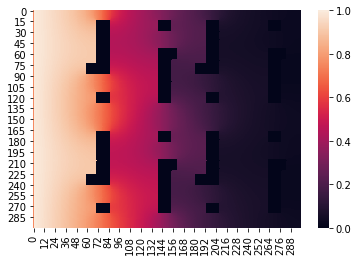

In [57]:
%%time
import seaborn
res = solve()
seaborn.heatmap(res)